<a href="https://colab.research.google.com/github/adh2080/ML-deep-learning-study/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [8]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


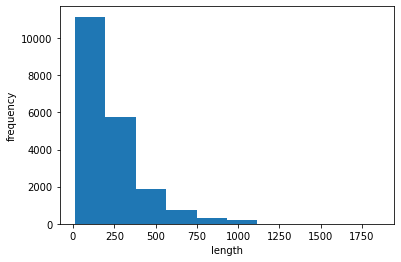

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen =100)

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(len(train_input[5]))

96


In [13]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [15]:
val_oh = keras.utils.to_categorical(val_seq)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8)                 4072      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 37ms/step - loss: 0.6965 - accuracy: 0.5106 - val_loss: 0.6952 - val_accuracy: 0.5098
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6926 - accuracy: 0.5217 - val_loss: 0.6925 - val_accuracy: 0.5178
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6898 - accuracy: 0.5328 - val_loss: 0.6905 - val_accuracy: 0.5256
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6873 - accuracy: 0.5436 - val_loss: 0.6884 - val_accuracy: 0.5370
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6846 - accuracy: 0.5541 - val_loss: 0.6862 - val_accuracy: 0.5410
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6815 - accuracy: 0.5647 - val_loss: 0.6832 - val_accuracy: 0.5524
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6770 - accuracy: 0.5824 - val_loss: 0.6776 - val_ac

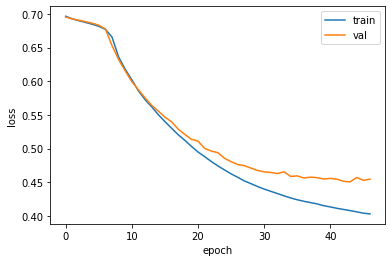

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 단어 임베딩

In [43]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [44]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [45]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 20ms/step - loss: 0.6780 - accuracy: 0.5743 - val_loss: 0.6639 - val_accuracy: 0.6142
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6433 - accuracy: 0.6604 - val_loss: 0.6316 - val_accuracy: 0.6848
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6126 - accuracy: 0.7114 - val_loss: 0.6070 - val_accuracy: 0.7124
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5883 - accuracy: 0.7357 - val_loss: 0.5855 - val_accuracy: 0.7386
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5671 - accuracy: 0.7525 - val_loss: 0.5673 - val_accuracy: 0.7452
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5478 - accuracy: 0.7649 - val_loss: 0.5530 - val_accuracy: 0.7532
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5314 - accuracy: 0.7735 - val_loss: 0.5389 - val_accuracy

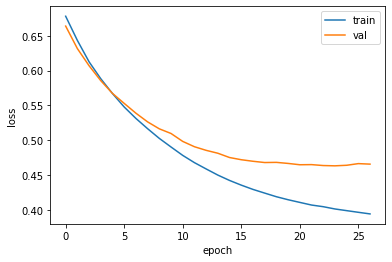

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()